In [1]:
import numpy as np                     
import pandas as pd                   

import matplotlib.pyplot as plt        
import seaborn as sns                   


In [2]:
df=pd.read_csv('imdb.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
df.rename(columns={'Series_Title':'Movie',},inplace=True)

In [5]:
#removing unnecessary features

df=df.drop(['Poster_Link','Overview'],axis=1)

In [6]:
df.head(2)

,Movie,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [8]:
df.isnull().sum()

Movie              0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
df.Gross = df.Gross[df.Gross.notnull()].apply(lambda x: x.replace(',', '')).astype('int')
df.Gross

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            NaN
996            NaN
997     30500000.0
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: float64

In [10]:
df.Gross.describe()

count    8.310000e+02
mean     6.803475e+07
std      1.097500e+08
min      1.305000e+03
25%      3.253559e+06
50%      2.353089e+07
75%      8.075089e+07
max      9.366622e+08
Name: Gross, dtype: float64

In [11]:
df['Director'].unique().shape

(548,)

In [12]:
df.Gross.isnull().sum()

169

In [13]:

df['Director'][df.Gross.isnull()].value_counts()

Akira Kurosawa      6
Alfred Hitchcock    5
Ingmar Bergman      4
Howard Hawks        4
Hayao Miyazaki      4
                   ..
Luis Buñuel         1
Sidney Lumet        1
David Lynch         1
Aditya Chopra       1
George Stevens      1
Name: Director, Length: 127, dtype: int64

In [14]:
df.Gross[df['Director']=='Akira Kurosawa']

31      269061.0
77           NaN
121      55240.0
172    4135750.0
181          NaN
189      96568.0
294          NaN
301          NaN
303          NaN
412          NaN
Name: Gross, dtype: float64

In [15]:
df.Gross[df['Director']=='Howard Hawks']

436    12535000.0
560     6540000.0
563      296000.0
709           NaN
711           NaN
715           NaN
718           NaN
Name: Gross, dtype: float64

In [16]:
for i in df['Director'][df.Gross.isnull()].unique():
    #df.loc[df.a==1,'b'] = df.loc[df.a==1,'b'].fillna(df[df['a'] == 1]['b'].median())
    df.loc[df['Director']==i,'Gross'] = df.loc[df['Director']==i,'Gross'].fillna(df[df['Director']==i]['Gross'].median())


In [17]:
df.Gross[df['Director']=='Howard Hawks']

436    12535000.0
560     6540000.0
563      296000.0
709     6540000.0
711     6540000.0
715     6540000.0
718     6540000.0
Name: Gross, dtype: float64

In [18]:
df.Gross[df['Director']=='Howard Hawks']

436    12535000.0
560     6540000.0
563      296000.0
709     6540000.0
711     6540000.0
715     6540000.0
718     6540000.0
Name: Gross, dtype: float64

In [19]:
#median=df.Gross.median()
df.Gross[df['Director']=='Akira Kurosawa']

31      269061.0
77      182814.5
121      55240.0
172    4135750.0
181     182814.5
189      96568.0
294     182814.5
301     182814.5
303     182814.5
412     182814.5
Name: Gross, dtype: float64

In [20]:
df.Gross[df['Director']=='George Stevens']

996   NaN
Name: Gross, dtype: float64

In [21]:
df.Gross.fillna(df.Gross.median(),inplace=True)
df.Gross.isnull().sum()

0

In [22]:
df.Gross[df['Director']=='George Stevens']

996    20186659.0
Name: Gross, dtype: float64

# Cleaning COLUMN META_SCORE

In [23]:
print('null values',df.Meta_score.isnull().sum())
df.Meta_score.info()

null values 157
<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Meta_score
Non-Null Count  Dtype  
--------------  -----  
843 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [24]:
df.Meta_score[df['Director']=='Howard Hawks']

436    93.0
560     NaN
563     NaN
709     NaN
711     NaN
715    91.0
718    87.0
Name: Meta_score, dtype: float64

In [25]:
df.Meta_score[df['Director']=='Akira Kurosawa']

31     98.0
77      NaN
121     NaN
172    96.0
181     NaN
189    98.0
294     NaN
301     NaN
303     NaN
412    84.0
Name: Meta_score, dtype: float64

In [26]:
for i in df['Director'][df.Meta_score.isnull()].unique():
    #df.loc[df.a==1,'b'] = df.loc[df.a==1,'b'].fillna(df[df['a'] == 1]['b'].median())
    df.loc[df['Director']==i,'Meta_score'] = df.loc[df['Director']==i,'Meta_score'].fillna(df[df['Director']==i]['Meta_score'].median())
#df.loc[df['Director']==i,'Meta_score'] = konse specific director me value save karna hai... 

In [27]:
df.Meta_score[df['Director']=='Howard Hawks']

436    93.0
560    91.0
563    91.0
709    91.0
711    91.0
715    91.0
718    87.0
Name: Meta_score, dtype: float64

In [28]:
df.Meta_score[df['Director']=='Akira Kurosawa']

31     98.0
77     97.0
121    97.0
172    96.0
181    97.0
189    98.0
294    97.0
301    97.0
303    97.0
412    84.0
Name: Meta_score, dtype: float64

In [29]:
df.Meta_score.isnull().sum()

101

In [30]:
df.Meta_score.describe()

count    899.000000
mean      78.497775
std       12.420325
min       28.000000
25%       71.000000
50%       80.000000
75%       88.000000
max      100.000000
Name: Meta_score, dtype: float64

In [31]:
df.Meta_score.fillna(78.497775,inplace=True)
df.Meta_score.isnull().sum()

0

# Cleaning Column Certificate

In [32]:
df.Certificate.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [33]:
df.Certificate=df.Certificate.replace(['G','PG','TV-Y','TV-Y7','TV-G','TV-PG'],'U')
df.Certificate=df.Certificate.replace(['PG-13','TV-14','U/A'],'UA')
df.Certificate=df.Certificate.replace(['R', 'NC-17','TV-MA'],'U')
df.Certificate=df.Certificate.replace(['nan','Passed','16','Unrated','GP','Approved'],np.NaN)


In [34]:
print(df.Certificate.unique())
df.Certificate.isnull().sum()

['A' 'UA' 'U' nan]


150

In [35]:
df.Certificate[df['Genre']=='Drama'].head(20)

0        A
9        A
17       A
20       U
40       U
53       A
88       U
89      UA
91      UA
97       A
98      UA
121    NaN
122    NaN
141     UA
149      A
154      U
156      U
188      U
190    NaN
200      U
Name: Certificate, dtype: object

In [36]:
df.Certificate.fillna('U',inplace=True)
df.Certificate.isnull().sum()

0

# Cleaning Column Released Year ##

In [37]:
import re
d=[]
for i in df.Released_Year:
    if re.findall("[a-zA-Z.]",i):
        d.append(i)
print(d)


['PG']


In [38]:
df.Released_Year.replace(['PG'],1970,inplace=True)

In [39]:
df.Released_Year=df.Released_Year.astype(int)

df.Released_Year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Released_Year
Non-Null Count  Dtype
--------------  -----
1000 non-null   int32
dtypes: int32(1)
memory usage: 4.0 KB


# Dealing with Column Gross 

In [40]:
df.Released_Year.sort_values(ascending=False).unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955,
       1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933,
       1932, 1931, 1930, 1928, 1927, 1926, 1925, 1924, 1922, 1921, 1920])

1gm of gold in each decade ( This will help to deal with Inflation, method called Indexation)

2011-20	1,402.48
	
2001-2010	617.31
	
1990-2000	453.09
	
1980-1991	410.9133333
		
1970-1981	199.9008333



In [41]:

df.Gross[df['Released_Year'].between(1971,1980, inclusive = True)]=df.Gross[df['Released_Year'].between(1971,1980, inclusive = True)].apply(lambda x:x/199.90)
df.Gross[df['Released_Year'].between(1981,1990, inclusive = True)]=df.Gross[df['Released_Year'].between(1981,1990, inclusive = True)].apply(lambda x:x/410.91)
df.Gross[df['Released_Year'].between(1991,2000, inclusive = True)]=df.Gross[df['Released_Year'].between(1991,2000, inclusive = True)].apply(lambda x:x/453.09)
df.Gross[df['Released_Year'].between(2001,2010, inclusive = True)]=df.Gross[df['Released_Year'].between(2001,2010, inclusive = True)].apply(lambda x:x/617.31)
df.Gross[df['Released_Year'].between(2011,2020, inclusive = True)]=df.Gross[df['Released_Year'].between(2011,2020, inclusive = True)].apply(lambda x:x/1402.50)
df.Gross[df['Released_Year'].between(1970,2020, inclusive = True)].value_counts().sum()

C:\Users\Singh\AppData\Local\Temp\ipykernel_7540\1925913812.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.Gross[df['Released_Year'].between(1971,1980, inclusive = True)]=df.Gross[df['Released_Year'].between(1971,1980, inclusive = True)].apply(lambda x:x/199.90)
C:\Users\Singh\AppData\Local\Temp\ipykernel_7540\1925913812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gross[df['Released_Year'].between(1971,1980, inclusive = True)]=df.Gross[df['Released_Year'].between(1971,1980, inclusive = True)].apply(lambda x:x/199.90)
C:\Users\Singh\AppData\Local\Temp\ipykernel_7540\1925913812.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.Gross[df['Released_Year'].betw

801

In [42]:
df.Gross.isnull().sum()

0

In [43]:
df.Gross[df.Director=="Akira Kurosawa"]

31     269061.000000
77     182814.500000
121     55240.000000
172     10064.856051
181    182814.500000
189     96568.000000
294    182814.500000
301    182814.500000
303    182814.500000
412       914.529765
Name: Gross, dtype: float64

In [44]:
a=df.Gross[df['Released_Year'].between(1971,1980)].value_counts().sum()
a2=df.Gross[df['Released_Year'].between(1981,1990)].value_counts().sum()
a3=df.Gross[df['Released_Year'].between(1991,2000)].value_counts().sum()
a4=df.Gross[df['Released_Year'].between(2001,2010)].value_counts().sum()
a5=df.Gross[df['Released_Year'].between(2011,2020)].value_counts().sum()
b=[a,a2,a3,a4,a5]
c=['1970-80','1980-90','1990-2000','2000-10','2010-20']
z = pd.DataFrame(zip(c, b), columns=['Year','Movies_per_decade'])
z

,Year,Movies_per_decade
0,1970-80,81
1,1980-90,89
2,1990-2000,161
3,2000-10,241
4,2010-20,225


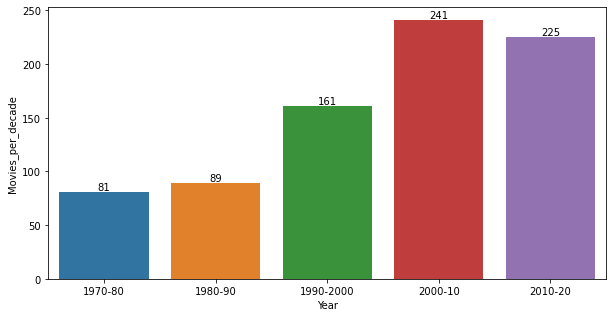

In [45]:
plt.figure( figsize = (10,5))

ax=sns.barplot(x = 'Year', y = 'Movies_per_decade', data = z)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [46]:
df.Meta_score=df.Meta_score.astype(int)
mask = (df['Released_Year'] >= 1970) & (df['Released_Year'] <= 2020)
print(df.loc[mask].shape[0])
df.loc[mask].head(10)

801


,Movie,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,62551.521773
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,675169.639820
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,866434.115760
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,286643.321661
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,612084.536133
6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,94,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,238206.012051
7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,94,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,213862.186321
8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,473953.435065
9,Fight Club,1999,A,139 min,Drama,8.8,66,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,81727.917191
10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,92,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,511160.924009


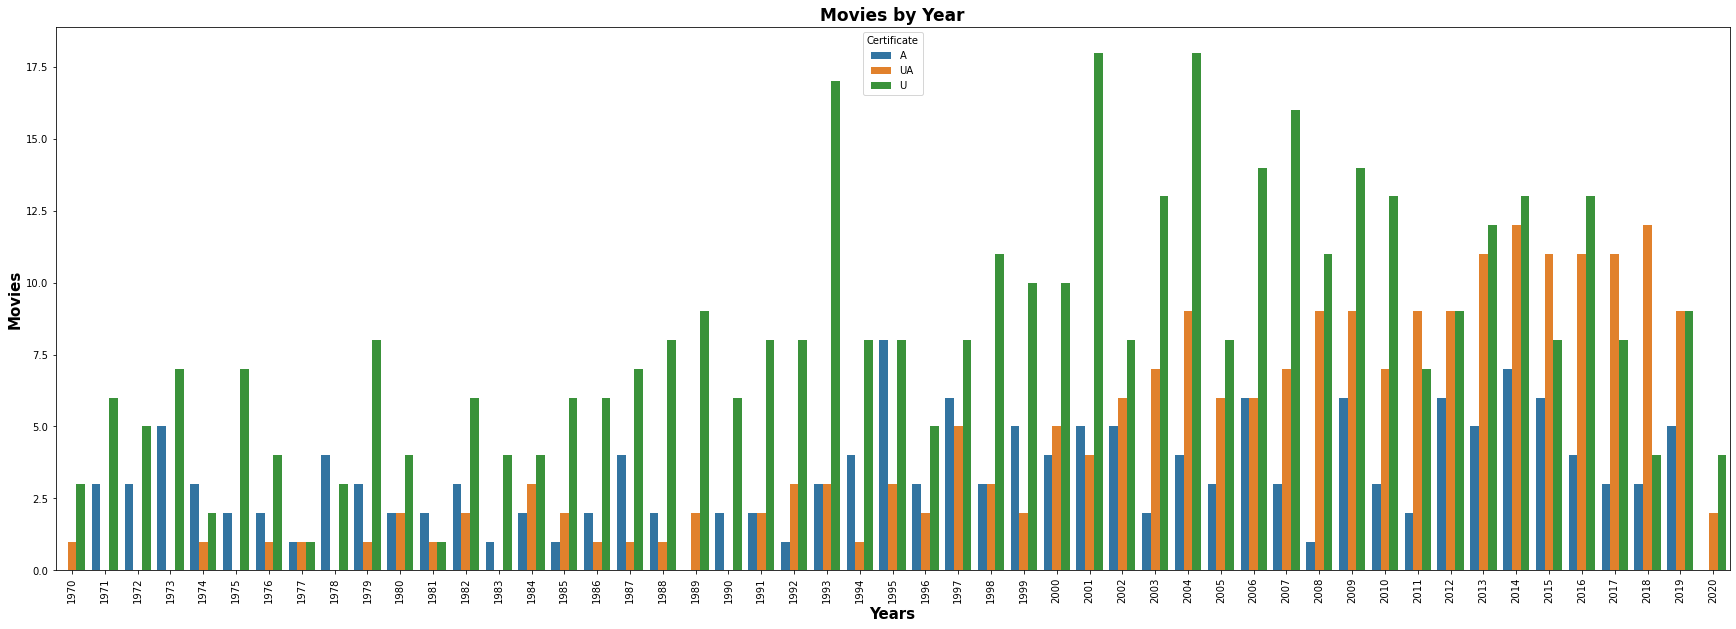

In [47]:
plt.figure(figsize=(30,10))
sns.countplot(x ='Released_Year', data =df.loc[mask],hue='Certificate')
plt.xticks(rotation = 90)
plt.xlabel('Years', fontsize= 15, fontweight = 'bold')
plt.ylabel('Movies', fontsize= 15, fontweight = 'bold')
plt.title('Movies by Year', fontsize = 17, fontweight = 'bold')
plt.show()

<AxesSubplot:xlabel='Meta_score', ylabel='IMDB_Rating'>

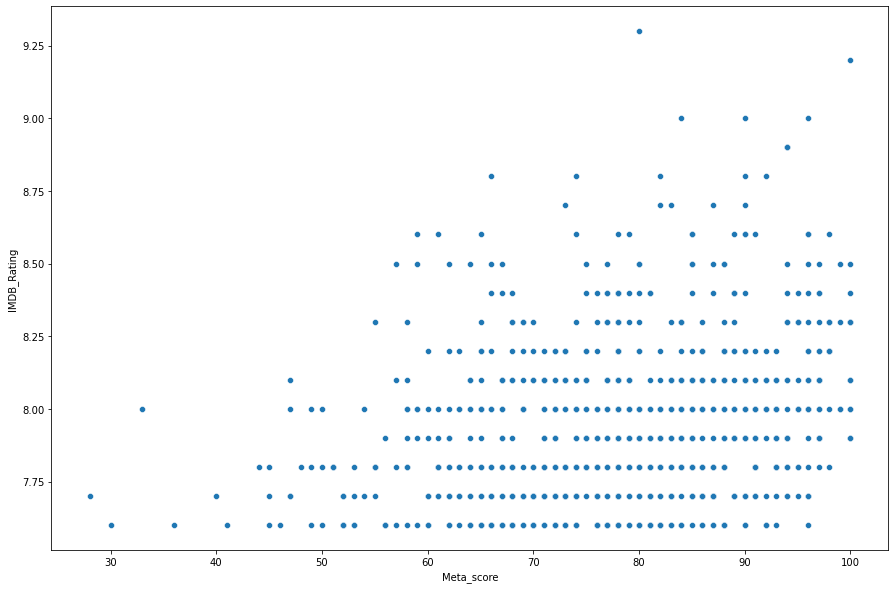

In [48]:
plt.figure( figsize = (15, 10))
sns.scatterplot(data=df, x="Meta_score", y="IMDB_Rating")

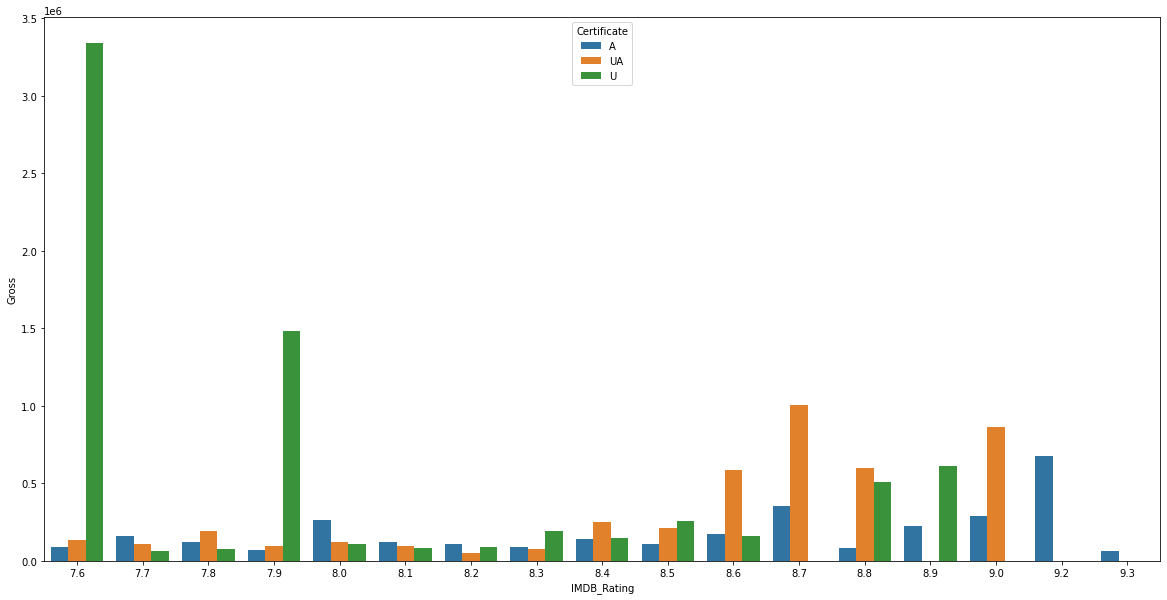

In [49]:
plt.figure( figsize = (20,10))
ax=sns.barplot(x ='IMDB_Rating', y = 'Gross', data =df.loc[mask],hue="Certificate",ci=None)
plt.show()

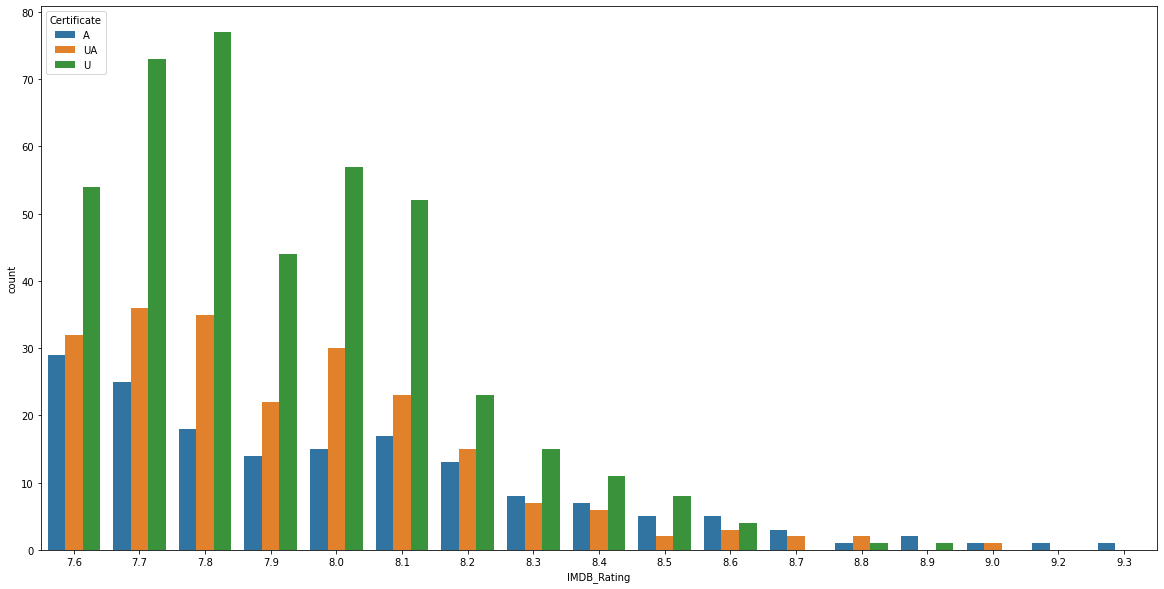

In [50]:
plt.figure( figsize = (20,10))
sns.countplot(x ='IMDB_Rating', data =df.loc[mask],hue='Certificate')
plt.show()

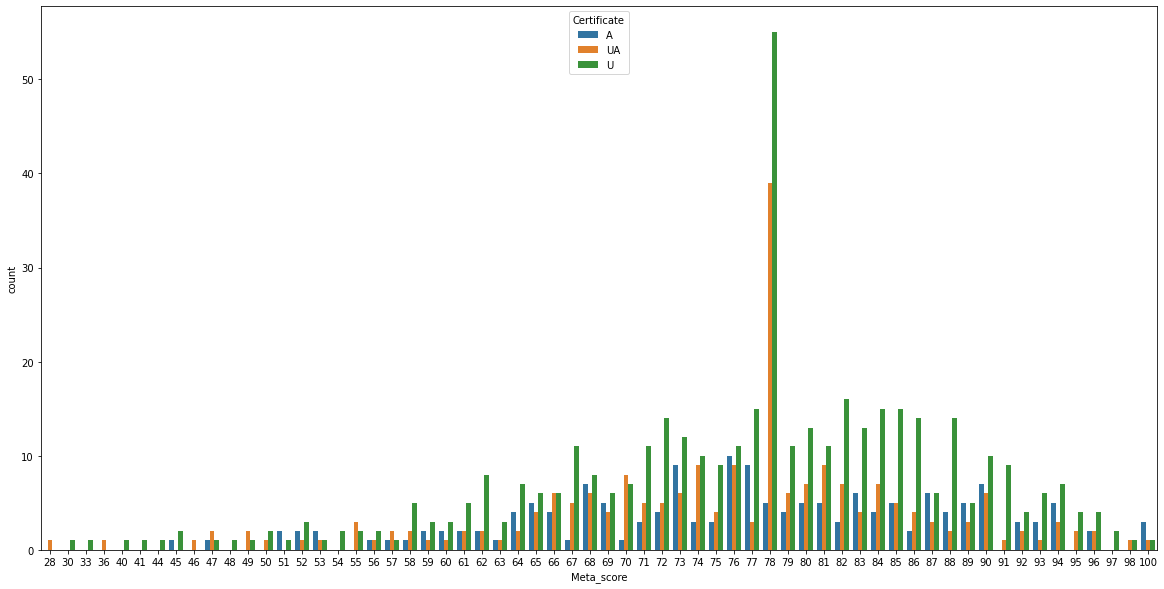

In [51]:
plt.figure( figsize = (20,10))
z=df.loc[mask][df.loc[mask].Meta_score>1]
sns.countplot(x ='Meta_score', data =z,hue='Certificate')
plt.show()

<AxesSubplot:xlabel='Meta_score', ylabel='Gross'>

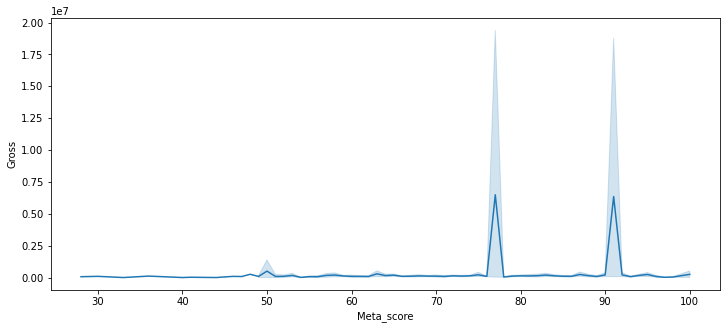

In [52]:
plt.figure( figsize = ( 12, 5))
sns.lineplot( x = 'Meta_score',
             y = 'Gross',
             data = df.loc[mask],
             )

In [53]:
#top 10 movies with highest rating 

In [54]:
#top 10 movies with highest revenue

In [55]:
#movies released per decade

In [56]:
#trend in Genre in last 10 decades

<AxesSubplot:title={'center':'Top 7 Gross Movies'}, xlabel='Movie', ylabel='Gross'>

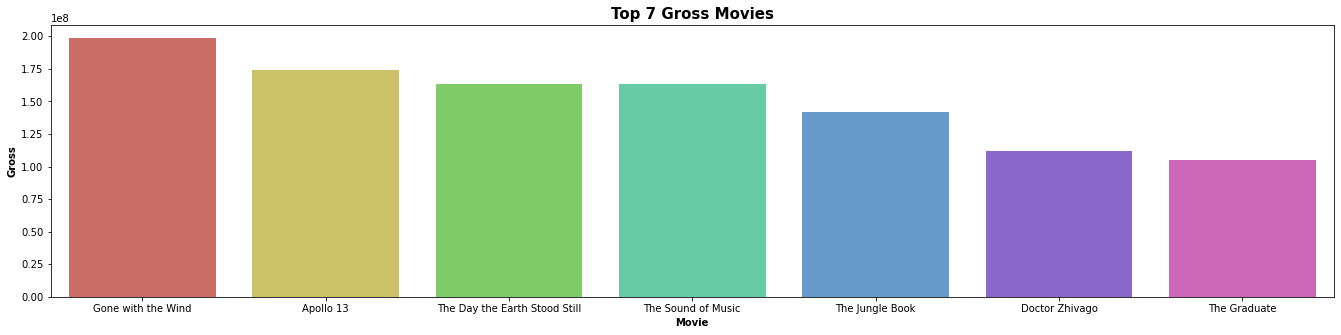

In [57]:
top_gross = df.sort_values(['Gross'], ascending = False)
fig, ax = plt.subplots(figsize = (23,5))

plt.title('Top 7 Gross Movies', fontsize = 15, fontweight = 'bold')
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel ('Gross', fontsize = 10, fontweight = 'bold')
sns.barplot(x=top_gross['Movie'][:7], y=top_gross['Gross'][:7], palette = 'hls')

<function matplotlib.pyplot.show(close=None, block=None)>

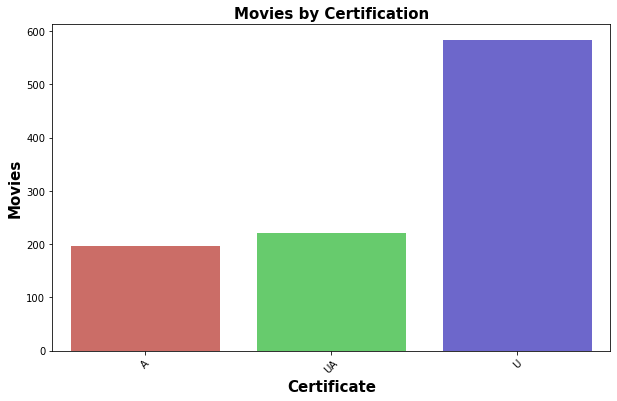

In [58]:
fig, ax=plt.subplots(figsize=(10,6))

sns.countplot(x=df['Certificate'], palette='hls')
plt.title('Movies by Certification', fontsize = 15, fontweight = 'bold')
plt.xlabel('Certificate',fontsize= 15, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('Movies',fontsize= 15, fontweight = 'bold')
plt.show

In [59]:
#which genre movies has max gross

In [60]:
#change in runtime over years

In [61]:
#actor who made max movies

In [62]:
#directors who made max movies 

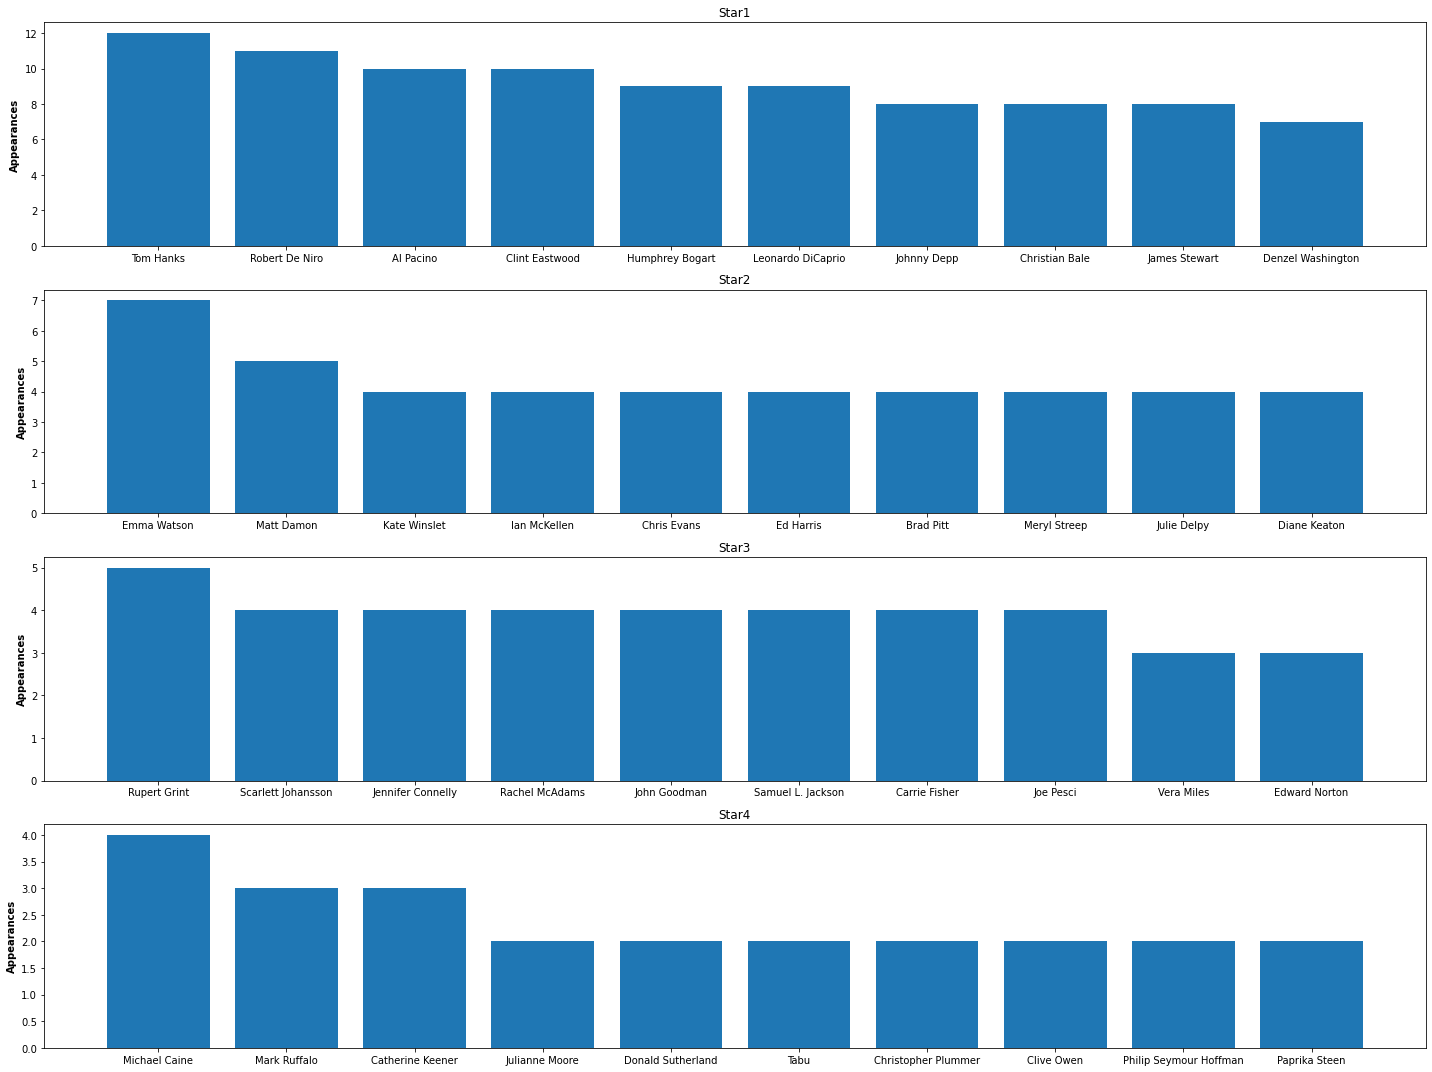

In [63]:
#Stars with most Occurences in movies
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,15))
ax=0
for x in stars:
    axs[ax].bar(df[x].value_counts()[:10].index,df[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

In [64]:
Certificate1 = IF(imdb_top_1000[Certificate]in{"16","G","PG","TV-Y","TV-Y7","TV-G","TV-PG","U","R", "NC-17","TV-MA"},"U",IF(imdb_top_1000[Certificate]in{"PG-13","TV-14","U/A","UA"},"UA",IF(imdb_top_1000[Certificate]in{"nan","Passed","Unrated","GP","Approved"},"",IF(imdb_top_1000[Certificate]="A","A"))))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4059608494.py, line 1)

In [ ]:
Column = IF(ISBLANK(imdb[Gross]),AVERAGE(imdb[Gross]),imdb[Gross])


In [ ]:
Column = IF(ISBLANK(FILTER(imdb,imdb[Director]="Akira Kurosawa")),CALCULATE(AVERAGE(imdb[Gross]),imdb[Director]="Akira Kurosawa"),imdb[Gross])